# Агрегирование: мин, макс и всё, что посередине

In [1]:
import numpy as np

In [3]:
L = np.random.random(100)

In [10]:
%timeit sum(L)

9.04 µs ± 56.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [11]:
%timeit np.sum(L)

3.43 µs ± 36.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [15]:
M = np.arange(1,10).reshape(3,3)

In [16]:
M

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [17]:
np.sum(M)  # работает с многомерными массивами

45

In [18]:
sum(M)

array([12, 15, 18])

In [27]:
big_array = np.random.rand(1000000)

In [29]:
%timeit min(big_array)

44.9 ms ± 444 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [30]:
%timeit np.min(big_array)

378 µs ± 3.29 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [31]:
%timeit big_array.min()  # min/max и т.д. как методы самого объекта массива

376 µs ± 2.32 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Многомерные агрегации (сводные показатели)

In [35]:
M = np.random.random((5,5))

In [36]:
M

array([[0.59238255, 0.83315097, 0.23869727, 0.3965887 , 0.93358045],
       [0.16620457, 0.1750463 , 0.33304747, 0.80604594, 0.13160616],
       [0.97403574, 0.61134909, 0.10303118, 0.49714999, 0.45892873],
       [0.45489607, 0.90780246, 0.75874638, 0.45928825, 0.48667763],
       [0.10544564, 0.2988811 , 0.13790194, 0.68791736, 0.36727934]])

In [37]:
M.sum()

11.915681290121553

In [38]:
M.sum(axis = 0)

array([2.29296456, 2.82622992, 1.57142424, 2.84699024, 2.37807232])

In [39]:
M.sum(axis = 1)

array([2.99439994, 1.61195045, 2.64449474, 3.06741079, 1.59742538])

In [40]:
M.min(axis = 0)  # по столбцам, axis - означает ось которая будет схлопнута

array([0.10544564, 0.1750463 , 0.10303118, 0.3965887 , 0.13160616])

In [41]:
M.min(axis = 1)  # по строкам

array([0.23869727, 0.13160616, 0.10303118, 0.45489607, 0.10544564])

#### Существуют NaN безопасные эквиваленты агрегирующих ф-ий, игнорирующие эл-ты с пустыми значениями np.nansum()

In [42]:
!head -4 president_heights.csv

"head" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.


In [43]:
import pandas as pd

In [44]:
data = pd.read_csv('data/president_heights.csv')

In [45]:
data

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183
5,6,John Quincy Adams,171
6,7,Andrew Jackson,185
7,8,Martin Van Buren,168
8,9,William Henry Harrison,173
9,10,John Tyler,183


In [47]:
heights = np.array(data['height(cm)'])

In [48]:
heights

array([189, 170, 189, 163, 183, 171, 185, 168, 173, 183, 173, 173, 175,
       178, 183, 193, 178, 173, 174, 183, 183, 168, 170, 178, 182, 180,
       183, 178, 182, 188, 175, 179, 183, 193, 182, 183, 177, 185, 188,
       188, 182, 185], dtype=int64)

In [49]:
heights.mean()

179.73809523809524

In [50]:
heights.std()

6.931843442745892

In [51]:
heights.max()

193

In [52]:
heights.min()

163

In [53]:
print(np.percentile(heights, 25))
print(np.median(heights))
print(np.percentile(heights, 75))

174.25
182.0
183.0


In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

Text(0, 0.5, 'number')

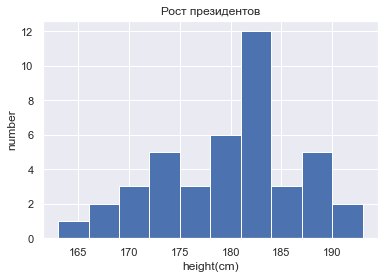

In [55]:
plt.hist(heights)
plt.title('Рост президентов')
plt.xlabel('height(cm)')
plt.ylabel('number')